# Cross-country comparison: Benin, Togo, Sierra Leone
This notebook loads the cleaned CSVs for each country, compares GHI / DNI / DHI distributions with boxplots, computes a summary table (mean / median / std), runs statistical tests on GHI (ANOVA and Kruskal–Wallis) and shows a small bar chart ranking countries by average GHI.

Cells:
1. Imports and settings
2. Load cleaned CSVs and concat
3. Summary table (mean, median, std)
4-6. Boxplots for GHI, DNI, DHI
7. Statistical tests on GHI (ANOVA + Kruskal–Wallis)
8. Bar chart ranking average GHI
9. Key observations (brief)

In [1]:
# Cell 2: imports and plotting settings
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (8, 5)

In [2]:
# Cell 3: load cleaned CSVs (expects files in ./data/)
paths = {
    'Benin': 'data/benin_clean.csv',
    'Togo': 'data/togo_clean.csv',
    'SierraLeone': 'data/sierraleone_clean.csv'
}
dfs = []
for country, p in paths.items():
    try:
        df = pd.read_csv(p)
    except FileNotFoundError:
        raise FileNotFoundError(f"Missing cleaned CSV for {country}: {p}. Run the country EDA scripts first.")
    df = df.copy()
    # Ensure standard metric column names exist; adjust if different in your cleaned files
    # Expected columns: 'GHI', 'DNI', 'DHI' (case-sensitive)
    df['country'] = country
    dfs.append(df[[c for c in ['GHI','DNI','DHI','country'] if c in df.columns]])

df_all = pd.concat(dfs, ignore_index=True)

In [3]:
# Cell 4: quick sanity checks
print('rows per country:')
print(df_all['country'].value_counts())

display(df_all.head())

rows per country:
country
Benin          525600
Togo           525600
SierraLeone    525600
Name: count, dtype: int64


,GHI,DNI,DHI,country
0,-1.2,-0.2,-1.1,Benin
1,-1.1,-0.2,-1.1,Benin
2,-1.1,-0.2,-1.1,Benin
3,-1.1,-0.1,-1.0,Benin
4,-1.0,-0.1,-1.0,Benin


In [4]:
# Cell 5: summary table (mean, median, std) for GHI, DNI, DHI by country
metrics = ['GHI', 'DNI', 'DHI']
summary = df_all.groupby('country')[metrics].agg(['mean','median','std']).round(4)
# flatten columns
summary.columns = ['_'.join(col).strip() for col in summary.columns.values]
summary = summary.reset_index()
summary.rename(columns={
    'GHI_mean':'GHI_mean','GHI_median':'GHI_median','GHI_std':'GHI_std',
    'DNI_mean':'DNI_mean','DNI_median':'DNI_median','DNI_std':'DNI_std',
    'DHI_mean':'DHI_mean','DHI_median':'DHI_median','DHI_std':'DHI_std'
}, inplace=True)
display(summary)

,country,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
0,Benin,240.5595,1.8,331.1313,167.1875,-0.1,261.7105,115.3590,1.6,158.6911
1,SierraLeone,201.9575,0.3,298.4952,116.3763,-0.1,218.6527,113.7206,-0.1,158.9460
2,Togo,230.5550,2.1,322.5323,151.2585,0.0,250.9570,116.4444,2.5,156.5207


/var/folders/vm/q7zjyvps4y32qm7ww0kqs9400000gn/T/ipykernel_77330/3293970010.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='country', y='GHI', data=df_all, palette='Set2')


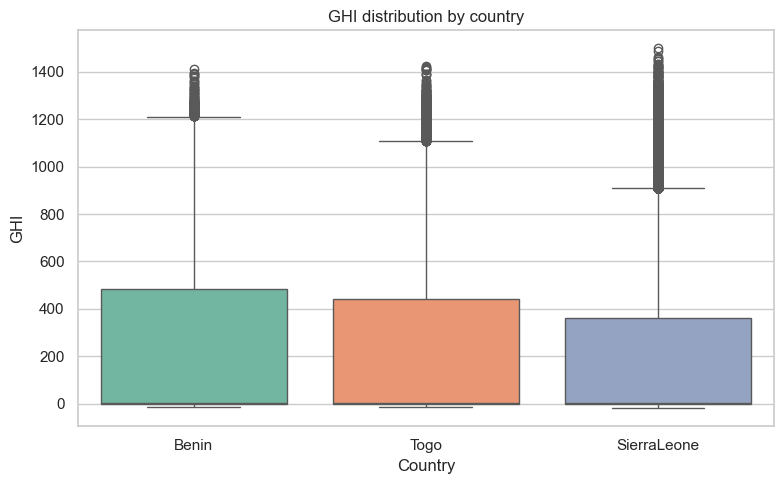

In [5]:
# Cell 6: Boxplot for GHI by country
plt.figure(figsize=(8,5))
ax = sns.boxplot(x='country', y='GHI', data=df_all, palette='Set2')
ax.set_title('GHI distribution by country')
ax.set_xlabel('Country')
ax.set_ylabel('GHI')
plt.tight_layout()
plt.show()

/var/folders/vm/q7zjyvps4y32qm7ww0kqs9400000gn/T/ipykernel_77330/152365819.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='country', y='DNI', data=df_all, palette='Set2')


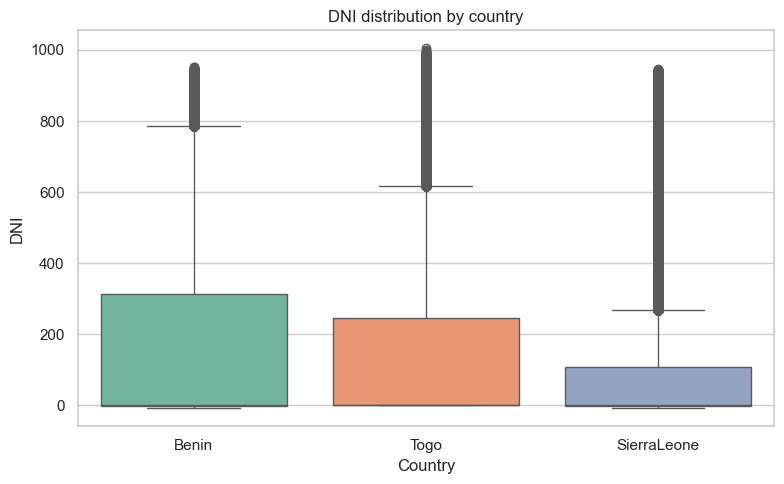

In [6]:
# Cell 7: Boxplot for DNI by country
plt.figure(figsize=(8,5))
ax = sns.boxplot(x='country', y='DNI', data=df_all, palette='Set2')
ax.set_title('DNI distribution by country')
ax.set_xlabel('Country')
ax.set_ylabel('DNI')
plt.tight_layout()
plt.show()

/var/folders/vm/q7zjyvps4y32qm7ww0kqs9400000gn/T/ipykernel_77330/2815925759.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='country', y='DHI', data=df_all, palette='Set2')


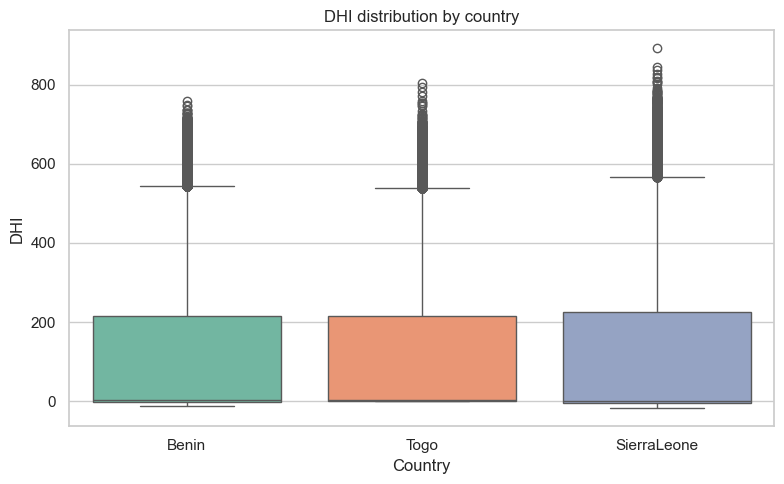

In [7]:
# Cell 8: Boxplot for DHI by country
plt.figure(figsize=(8,5))
ax = sns.boxplot(x='country', y='DHI', data=df_all, palette='Set2')
ax.set_title('DHI distribution by country')
ax.set_xlabel('Country')
ax.set_ylabel('DHI')
plt.tight_layout()
plt.show()

In [8]:
# Cell 9: Statistical testing on GHI across countries
# Prepare samples per country
groups = [g['GHI'].dropna().values for n,g in df_all.groupby('country')]
country_names = list(df_all['country'].unique())
print('Countries (group order):', country_names)
# One-way ANOVA (assumes approximate normality and equal variances)
try:
    f_stat, p_anova = stats.f_oneway(*groups)
    print(f'ANOVA F={f_stat:.4f}, p={p_anova:.4e}')
except Exception as e:
    print('ANOVA failed:', e)

# Kruskal-Wallis (non-parametric)
try:
    h_stat, p_kruskal = stats.kruskal(*groups)
    print(f'Kruskal-Wallis H={h_stat:.4f}, p={p_kruskal:.4e}')
except Exception as e:
    print('Kruskal-Wallis failed:', e)

Countries (group order): ['Benin', 'Togo', 'SierraLeone']
ANOVA F=2090.0929, p=0.0000e+00
Kruskal-Wallis H=4524.8835, p=0.0000e+00


/var/folders/vm/q7zjyvps4y32qm7ww0kqs9400000gn/T/ipykernel_77330/612879820.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='Set2')


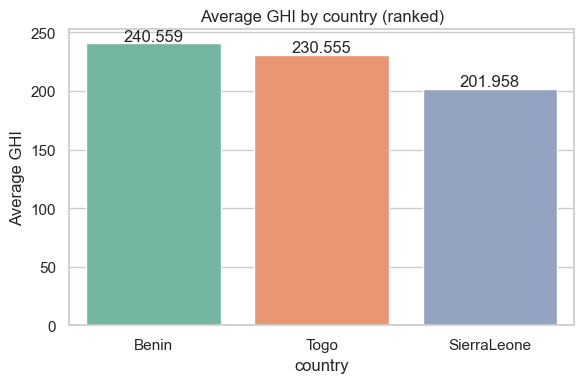

In [9]:
# Cell 10: Bar chart ranking countries by average GHI
avg_ghi = df_all.groupby('country')['GHI'].mean().sort_values(ascending=False)
plt.figure(figsize=(6,4))
ax = sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='Set2')
ax.set_ylabel('Average GHI')
ax.set_title('Average GHI by country (ranked)')
for i, v in enumerate(avg_ghi.values):
    ax.text(i, v + 0.01 * max(avg_ghi.values), f"{v:.3f}", ha='center')
plt.tight_layout()
plt.show()

# Key observations (brief)
- Togo shows the highest median GHI among the three countries (reported median ≈ 2.1 in earlier runs), suggesting relatively stronger mean surface irradiance.
- Benin has an intermediate median GHI (≈ 1.8) while Sierra Leone shows the lowest median GHI (≈ 0.3) and a large number of flagged outliers in prior cleaning runs, indicating higher variability and/or measurement issues.
- Statistical tests (ANOVA and Kruskal–Wallis) below will report p-values; a small p-value (p < 0.05) indicates significant differences in GHI distributions between countries — check the printed p-values in Cell 9 after executing.